In [27]:
import sys
import urllib

from keras.layers import Dense, Flatten

from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import optimizers

import numpy as np
from PIL import Image
from io import BytesIO

from studio import fs_tracker, model_util, magics

### Set up learning parameters

In [29]:
batch_size = 128
no_epochs = 10
lr = 0.01

### Load data, define and train model

In [26]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=lr),
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(
    fs_tracker.get_model_directory() +
    '/checkpoint.{epoch:02d}-{val_loss:.2f}.hdf')

tbcallback = TensorBoard(log_dir=fs_tracker.get_tensorboard_dir(),
                         histogram_freq=0,
                         write_graph=True,
                         write_images=True)

training_stats = model.fit(
    x_train, y_train, validation_data=(
        x_test,
        y_test),
    epochs=no_epochs,
    callbacks=[checkpointer, tbcallback],
    batch_size=batch_size)

history = training_stats.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - ETA: 0s - loss: 1.1536 - acc: 0.6543 - val_loss: 0.7753 - val_acc: 0.7337
Epoch 2/10
60000/60000 [==============================] - ETA: 0s - loss: 0.6677 - acc

### Visualize results

In [33]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

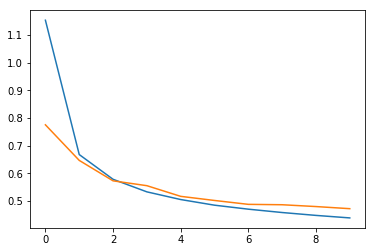

In [35]:
plt.plot(range(no_epochs), history['loss'], range(no_epochs), history['val_loss'])